In [1]:
# مكتبة للتعامل مع نظام التشغيل والملفات
import os
# مسار الصور 
images_dir = "images\\" 

In [2]:
# قائمة أسماء الأصناف
classes=os.listdir(images_dir)
# عدد الأصناف
count_classes=len(classes)
classes

['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral']

In [3]:
# حساب توزع الصور على المشاعر
total=0
dict={}
# الدوران على المجلدات الفرعية
for folder in os.listdir(images_dir) :
    # عدد الملفات في المجلد
    c_total= len(os.listdir(images_dir+folder))
    # الإضافة للقاموس
    dict[folder]= c_total
    # مجموع تراكمي
    total = total + c_total

print("Total images : ", total)
print("Count images in each class ", dict)

Total images :  16876
Count images in each class  {'Angry': 2832, 'Disgust': 380, 'Fear': 2535, 'Happy': 6834, 'Neutral': 4295}


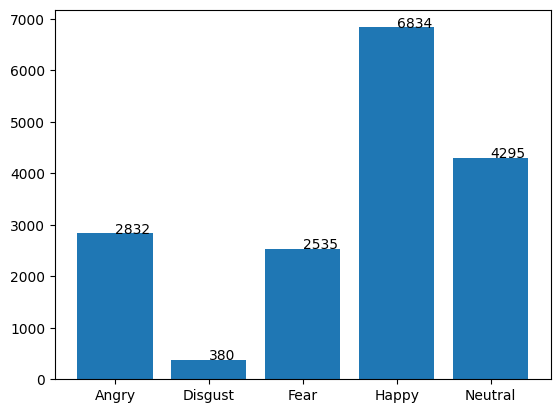

In [4]:
# مكتبة الرسم
import matplotlib.pyplot as plt
import numpy as np
# الأصناف
classes = list(dict.keys())
# الأعداد
classes_count = list(dict.values())
# إضافة الأعداد في رؤوس الأشرطة
for i in range(len(classes)):
    plt.text(i,classes_count[i],classes_count[i])
# رسم الأشرطة
plt.bar(range(len(dict)), classes_count, tick_label=classes)
plt.show()

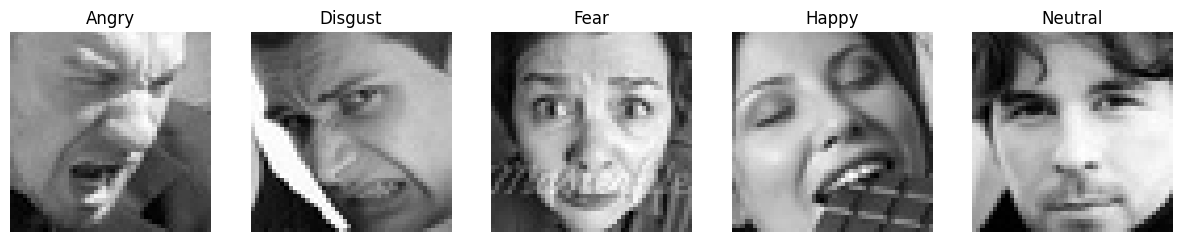

In [5]:
# Python Imaging Library
# pip install Pillow 
from PIL import Image

# إنشاء شكل من صف و خمسة أعمدة
fig, axs = plt.subplots(1, len(classes), figsize=(15, 3))
# الدوران على المجلدات المسماة بالأصناف
for i, class_name in enumerate(classes):
    # قائمة ملفات المجلد
    class_images = os.listdir(os.path.join(images_dir, class_name))
    # مسار أول صورة من المجلد
    img_path = os.path.join(images_dir, class_name, class_images[0])
    # تحميل الصورة
    img = Image.open(img_path)
    # إظهار الصورة
    axs[i].imshow(img, cmap='gray')
    # عنوان الصورة
    axs[i].set_title(class_name)
    # حذف المحاور
    axs[i].axis('off')

plt.show()

In [6]:
# تحديد قياس الصور
Image_Height = 48
Image_Width = 48
# قياس الصور المناسب
target_size = (Image_Height, Image_Width)

In [7]:
# قائمة بأسماء ملفات الصور
image_files = []
# قائمة بتسمية الصنف الموافق
labels = []


# تعبئة القوائم
for root, dirs, files in os.walk(images_dir):
    for file in files:
        # اختبار الصور من اللاحقة
        if file.endswith(('.jpg', '.jpeg', '.png')):
            # الإضافة لقائمة أسماء الملفات
            image_files.append(os.path.join(root, file))
            # إضافة اسم الصنف
            labels.append(os.path.basename(root))

In [8]:
print(image_files[0])
print(labels[0])

images\Angry\Training_10017485.jpg
Angry


In [9]:
# التقسيم لتدريب واختبار
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_files, labels, test_size=0.2, random_state=42)

In [10]:
# تحميل صورة والمعالجة الأولية لها
def load_and_preprocess_image(image_path, target_size):
    # تحميل صورة
    img = Image.open(image_path)
    # التحويل لصور ملونة
    img = img.convert('RGB') if img.mode != 'RGB' else img
    # ضبط حجم الصورة
    img = img.resize(target_size)
    # التحويل لمصفوفة نمباي وتقييس الصورة
    img = np.array(img) / 255.0
    return img

In [11]:
# تطبيق الدالة السابقة
X_train_processed = np.array([load_and_preprocess_image(image_path, target_size) for image_path in X_train])
X_test_processed = np.array([load_and_preprocess_image(image_path, target_size) for image_path in X_test])


In [12]:
# مكتبة مرمز الأصناف
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
# ترميز خرج التدريب
y_train_encoded = label_encoder.fit_transform(y_train)
# ترميز خرج الاختبار
y_test_encoded = label_encoder.transform(y_test)
y_test_encoded

array([3, 3, 3, ..., 3, 0, 3])

In [13]:
# قائمة أسماء الأصناف مفهرسة وفق الترميز
classes_labels=[]
for i in range(count_classes):
    class_label=label_encoder.inverse_transform([i])
    classes_labels.append(class_label[0])
classes_labels

['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral']

In [15]:
# مكتبة تحويل الترميز إلى فئوي
from keras.utils import to_categorical
y_train_categorical = to_categorical(y_train_encoded)
y_test_categorical = to_categorical(y_test_encoded)
y_test_categorical

In [16]:
# تثبيت العشوائية لتوليد نفس النتائج كل مرة
import random
import numpy as np
import tensorflow as tf
# يُمكن استخدام أي رقم لبذرة العشوائيه
seed_value = 42 
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)

In [17]:
from keras.applications import VGG16

# تحميل النموذج المدرب
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(Image_Height, Image_Width, 3))

# تجميد كافة طبقات النموذج المدرب
for layer in base_model.layers:
    layer.trainable = False

print("Layers : ", len(base_model.layers))
base_model.summary()

Layers :  19
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)

In [18]:
from keras.models import Sequential
from keras.layers import Input, Flatten, Dense, Dropout
from keras.optimizers import Adam

# نموذج تسلسلي
model = Sequential()
# طبقة الدخل
model.add(Input(shape=(Image_Height, Image_Width, 3)))  
# إضافة النموذج المدرب
model.add(base_model)  
# إضافة طبقة تسطيح
model.add(Flatten()) 
# طبقة تسريب
model.add(Dropout(0.2))  
# طبقة كثيفة
model.add(Dense(128, activation='relu'))  
# طبقة تسريب
model.add(Dropout(0.2))  
# طبقة كثيفة
model.add(Dense(64, activation='relu'))  
# طبقة الخرج
model.add(Dense(count_classes, activation='softmax'))  

# تهيئة النموذج
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# طباعة ملخص النموذج
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 128)               65664     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 5)                 3

In [19]:
# تدريب النموذج
epochs = 16
history = model.fit(
    X_train_processed, 
    y_train_categorical,
    epochs=epochs,
    validation_data=(X_test_processed, y_test_categorical)
)

Epoch 1/16
422/422 [==============================] - 84s 194ms/step - loss: 1.3378 - accuracy: 0.4318 - val_loss: 1.2685 - val_accuracy: 0.4873
Epoch 2/16
422/422 [==============================] - 78s 186ms/step - loss: 1.2733 - accuracy: 0.4683 - val_loss: 1.2461 - val_accuracy: 0.4917
Epoch 3/16
422/422 [==============================] - 81s 193ms/step - loss: 1.2434 - accuracy: 0.4829 - val_loss: 1.2087 - val_accuracy: 0.5068
Epoch 4/16
422/422 [==============================] - 81s 192ms/step - loss: 1.2220 - accuracy: 0.4933 - val_loss: 1.2165 - val_accuracy: 0.5021
Epoch 5/16
422/422 [==============================] - 83s 196ms/step - loss: 1.2128 - accuracy: 0.5021 - val_loss: 1.2013 - val_accuracy: 0.5148
Epoch 6/16
422/422 [==============================] - 79s 188ms/step - loss: 1.1971 - accuracy: 0.5073 - val_loss: 1.1979 - val_accuracy: 0.5240
Epoch 7/16
422/422 [==============================] - 80s 191ms/step - loss: 1.1827 - accuracy: 0.5198 - val_loss: 1.1816 - val_ac

In [21]:
# تقييم النموذج

score = model.evaluate(X_test_processed, y_test_categorical)
print('Test accuracy:', round(score[1]*100, 2))

106/106 [==============================] - 15s 143ms/step - loss: 1.1466 - accuracy: 0.5355
Test accuracy: 53.55


In [ ]:
# تجميد كافة طبقات النموذج المدرب
for layer in base_model.layers:
    layer.trainable = False
# صقل النموذج المدرب بفك تجميد بعض الطبقات الأخيرة منه
for layer in base_model.layers[-4:]:
    layer.trainable = True

In [44]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

In [27]:
# نموذج تسلسلي
model = Sequential()
# طبقة الدخل
model.add(Input(shape=(Image_Height, Image_Width, 3)))  
# إضافة النموذج المدرب
model.add(base_model)  
# إضافة طبقة تسطيح
model.add(Flatten()) 
# طبقة تسريب
model.add(Dropout(0.2))  
# طبقة كثيفة
model.add(Dense(128, activation='relu'))  
# طبقة تسريب
model.add(Dropout(0.2))  
# طبقة كثيفة
model.add(Dense(64, activation='relu'))  
# طبقة الخرج
model.add(Dense(count_classes, activation='softmax'))  

# تهيئة النموذج
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# طباعة ملخص النموذج
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               65664     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 5)                

In [28]:
# تدريب النموذج
history = model.fit(
    X_train_processed, 
    y_train_categorical,
    epochs=epochs,
    validation_data=(X_test_processed, y_test_categorical)
)

Epoch 1/16
422/422 [==============================] - 179s 419ms/step - loss: 1.3052 - accuracy: 0.4540 - val_loss: 1.1588 - val_accuracy: 0.4882
Epoch 2/16
422/422 [==============================] - 170s 403ms/step - loss: 1.0736 - accuracy: 0.5820 - val_loss: 1.0133 - val_accuracy: 0.6117
Epoch 3/16
422/422 [==============================] - 169s 401ms/step - loss: 0.9701 - accuracy: 0.6338 - val_loss: 0.9921 - val_accuracy: 0.6262
Epoch 4/16
422/422 [==============================] - 174s 412ms/step - loss: 0.8923 - accuracy: 0.6676 - val_loss: 0.9238 - val_accuracy: 0.6490
Epoch 5/16
422/422 [==============================] - 171s 406ms/step - loss: 0.8422 - accuracy: 0.6855 - val_loss: 0.9637 - val_accuracy: 0.6520
Epoch 6/16
422/422 [==============================] - 170s 402ms/step - loss: 0.7803 - accuracy: 0.7136 - val_loss: 0.9462 - val_accuracy: 0.6422
Epoch 7/16
422/422 [==============================] - 164s 389ms/step - loss: 0.7392 - accuracy: 0.7301 - val_loss: 0.9665 -

In [35]:
# تقييم النموذج

score = model.evaluate(X_test_processed, y_test_categorical)
print('Test accuracy:', round(score[1]*100, 2))

106/106 [==============================] - 16s 148ms/step - loss: 1.3456 - accuracy: 0.6718
Test accuracy: 67.18


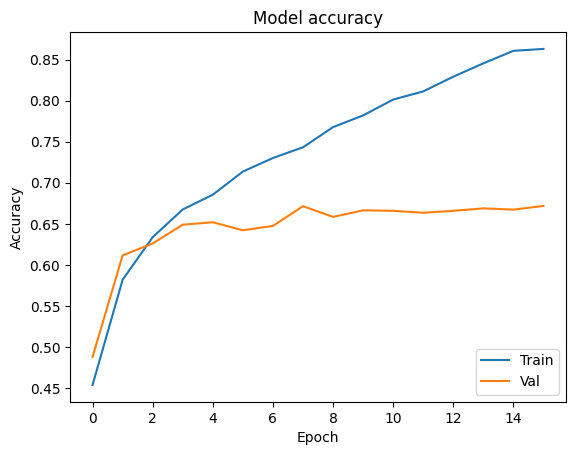

In [36]:
# مشاهدة دقة التدريب والتقييم مع عدد الدورات

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [37]:
# التنبؤ على بيانات التقييم
y_pred = model.predict(X_test_processed)
y_pred

106/106 [==============================] - 16s 146ms/step


array([[5.7268591e-07, 9.9882456e-11, 1.1009996e-05, 9.9114746e-01,
        8.8410461e-03],
       [2.1840647e-07, 4.6493569e-12, 1.5231499e-06, 9.9855095e-01,
        1.4472498e-03],
       [7.4766279e-04, 1.5642655e-07, 9.5269067e-04, 9.9779069e-01,
        5.0880789e-04],
       ...,
       [3.8500884e-01, 2.1694380e-08, 1.1718747e-01, 4.9780113e-01,
        2.6072439e-06],
       [7.8079951e-01, 1.6064000e-04, 2.1403290e-01, 4.1534677e-03,
        8.5339800e-04],
       [6.3132930e-01, 4.9773090e-02, 2.6373348e-01, 1.2783766e-02,
        4.2380430e-02]], dtype=float32)

In [38]:
# التحويل من احتمالات الأصناف إلى ترميزها 
y_pred = np.argmax(y_pred, axis=1)   
y_pred

array([3, 3, 3, ..., 3, 0, 0], dtype=int64)

In [41]:
# إيجاد تسميات الأصناف الموافقة للترميزات
pred_class_labels = []
for c in y_pred:
    pred_class_labels.append(label_encoder.inverse_transform([c])[0])

pred_class_labels

['Happy',
 'Happy',
 'Happy',
 'Happy',
 'Happy',
 'Happy',
 'Happy',
 'Happy',
 'Happy',
 'Happy',
 'Angry',
 'Happy',
 'Happy',
 'Fear',
 'Happy',
 'Happy',
 'Angry',
 'Happy',
 'Happy',
 'Angry',
 'Happy',
 'Neutral',
 'Neutral',
 'Neutral',
 'Fear',
 'Fear',
 'Happy',
 'Neutral',
 'Fear',
 'Fear',
 'Happy',
 'Neutral',
 'Disgust',
 'Angry',
 'Fear',
 'Happy',
 'Happy',
 'Fear',
 'Fear',
 'Happy',
 'Neutral',
 'Happy',
 'Neutral',
 'Fear',
 'Angry',
 'Angry',
 'Fear',
 'Happy',
 'Happy',
 'Fear',
 'Happy',
 'Angry',
 'Happy',
 'Happy',
 'Fear',
 'Neutral',
 'Neutral',
 'Happy',
 'Angry',
 'Happy',
 'Neutral',
 'Happy',
 'Happy',
 'Neutral',
 'Angry',
 'Happy',
 'Neutral',
 'Happy',
 'Neutral',
 'Neutral',
 'Happy',
 'Happy',
 'Neutral',
 'Neutral',
 'Neutral',
 'Happy',
 'Happy',
 'Neutral',
 'Angry',
 'Happy',
 'Disgust',
 'Happy',
 'Happy',
 'Angry',
 'Disgust',
 'Neutral',
 'Neutral',
 'Neutral',
 'Angry',
 'Fear',
 'Angry',
 'Happy',
 'Fear',
 'Happy',
 'Happy',
 'Happy',
 'Happ

In [42]:
# مصفوفة الارتباك
from sklearn.metrics import confusion_matrix 
# حساب مصفوفة الارتباك
cm = confusion_matrix(y_test, pred_class_labels)
cm

array([[ 289,    5,   83,   83,   88],
       [  24,   27,    8,    8,   11],
       [  78,    1,  277,   77,   70],
       [  69,    1,   65, 1159,  102],
       [  96,    0,   74,  165,  516]], dtype=int64)

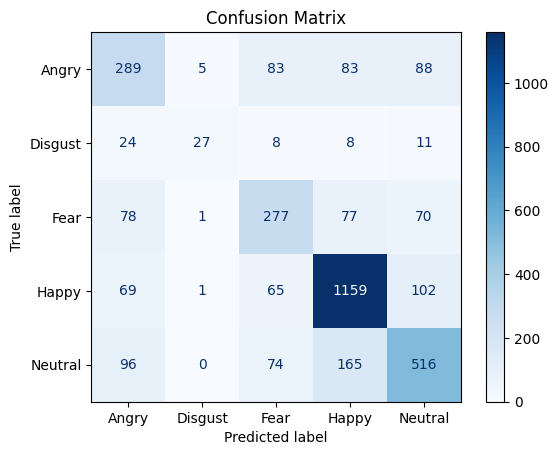

In [43]:
from sklearn.metrics import  ConfusionMatrixDisplay
# رسم مصفوفة الارتباك
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes_labels)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.show()